In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
inpath = "E:/OneDrive/Datasets/barplot_Adri.xlsx"
#inpath = "C:/Users/Diego Torres/OneDrive/Datasets/barplot_Adri.xlsx"
data=pd.read_excel(inpath)
print(data)


    Aperture  Peso Retenido (g)  Peso acumulado (g)      mm       Phi  \
0       1000             0.0000              0.0000   1.000  0.000000   
1        850             0.0000              0.0000   0.850  0.234465   
2        600             0.0352              0.0352   0.600  0.736966   
3        500             0.0097              0.0449   0.500  1.000000   
4        425             0.0107              0.0556   0.425  1.234465   
5        300             0.0415              0.0971   0.300  1.736966   
6        250             0.0840              0.1811   0.250  2.000000   
7        180             0.6128              0.7939   0.180  2.473931   
8        150             1.0540              1.8479   0.150  2.736966   
9        125            69.7989             71.6468   0.125  3.000000   
10        90            62.1060            133.7528   0.090  3.473931   
11        63            15.6323            149.3851   0.063  3.988504   
12        45             0.9275            150.3126

In [26]:

#################
# Descriptivos
print('Summary:')
data.info()
print(' ')
print('Descriptivos:')
print(data.describe().round(2).transpose())
print(' ')
print('Nulos por campo:')
print(data.isnull().sum())  # total de nulls por variable
print(' ')
print('Dimensiones:')
print(data.shape[0])

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aperture             14 non-null     int64  
 1   Peso Retenido (g)    14 non-null     float64
 2   Peso acumulado (g)   14 non-null     float64
 3   mm                   14 non-null     float64
 4   Phi                  14 non-null     float64
 5   Termino descriptivo  14 non-null     object 
 6   Peso Retenido (%)    14 non-null     float64
 7   order                14 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.0+ KB
 
Descriptivos:
                    count    mean     std    min    25%     50%     75%  \
Aperture             14.0  330.14  307.13  44.00  98.75  215.00  481.25   
Peso Retenido (g)    14.0   10.75   23.79   0.00   0.02    0.14    1.02   
Peso acumulado (g)   14.0   47.05   67.71   0.00   0.05    0.49  118.23   
mm         

In [4]:
""" # Tus datos de Aperture
#aperture_values = [1000, 850, 600, 500, 425, 300, 250, 180, 150, 125, 90, 63]

# Calcular el número total de datos
#total_data = len(aperture_values)

n_bins = 7

# Calcula los límites de los bins
bin_edges = np.round(np.histogram_bin_edges(data.Aperture, bins=n_bins),2)
print(bin_edges.dtype)
print(type(bin_edges))
print(bin_edges)

# Restarle 0.001 al primer elemento
bin_edges[0] -= 0.001

# Sumarle 0.001 al último elemento
bin_edges[-1] += 0.001


print(bin_edges)

#print(type(bin_edges)) """


' # Tus datos de Aperture\n#aperture_values = [1000, 850, 600, 500, 425, 300, 250, 180, 150, 125, 90, 63]\n\n# Calcular el número total de datos\n#total_data = len(aperture_values)\n\nn_bins = 7\n\n# Calcula los límites de los bins\nbin_edges = np.round(np.histogram_bin_edges(data.Aperture, bins=n_bins),2)\nprint(bin_edges.dtype)\nprint(type(bin_edges))\nprint(bin_edges)\n\n# Restarle 0.001 al primer elemento\nbin_edges[0] -= 0.001\n\n# Sumarle 0.001 al último elemento\nbin_edges[-1] += 0.001\n\n\nprint(bin_edges)\n\n#print(type(bin_edges)) '

In [22]:
""" 
# Usar la función cut() para dividir la variable en categorías

data['cut_data'] = pd.cut(data.Aperture, bins=bin_edges).astype(str) """

data['Peso Retenido (%)'] = (data['Peso Retenido (g)']*100)/data['Peso Retenido (g)'].sum()

data['Peso Retenido (g)'] = round(data['Peso Retenido (g)'],2)

# Definir una función que asigne valores ascendentes a cada categoría
def asignar_valores(categoria):
    global categoria_actual, valor_asignado
    if categoria != categoria_actual:
        valor_asignado += 1
        categoria_actual = categoria
    return valor_asignado

# Inicializar variables globales
categoria_actual = None
valor_asignado = 0

# Aplicar la función a la columna "Categoría" y crear la nueva columna "NuevoCampo"
data['order'] = data['Termino descriptivo'].apply(asignar_valores)
print(data)
print(' ')



    Aperture  Peso Retenido (g)  Peso acumulado (g)      mm       Phi  \
0       1000               0.00              0.0000   1.000  0.000000   
1        850               0.00              0.0000   0.850  0.234465   
2        600               0.04              0.0352   0.600  0.736966   
3        500               0.01              0.0449   0.500  1.000000   
4        425               0.01              0.0556   0.425  1.234465   
5        300               0.04              0.0971   0.300  1.736966   
6        250               0.08              0.1811   0.250  2.000000   
7        180               0.61              0.7939   0.180  2.473931   
8        150               1.05              1.8479   0.150  2.736966   
9        125              69.80             71.6468   0.125  3.000000   
10        90              62.11            133.7528   0.090  3.473931   
11        63              15.63            149.3851   0.063  3.988504   
12        45               0.93            150.3126

In [29]:
aggregated_data = data.groupby(['Termino descriptivo', 'order'])['Peso Retenido (%)'].sum().reset_index().sort_values('order',ascending=True)
aggregated_data['Peso Retenido (%)'] = round(aggregated_data['Peso Retenido (%)'],3)
#################
# Descriptivos
print(aggregated_data)
print(' ')

  Termino descriptivo  order  Peso Retenido (%)
4    Arena muy gruesa      1              0.000
1        Arena gruesa      2              0.030
2         Arena media      3              0.090
0          Arena fina      4             47.478
3      Arena muy fina      5             51.645
5                Limo      6              0.756
 


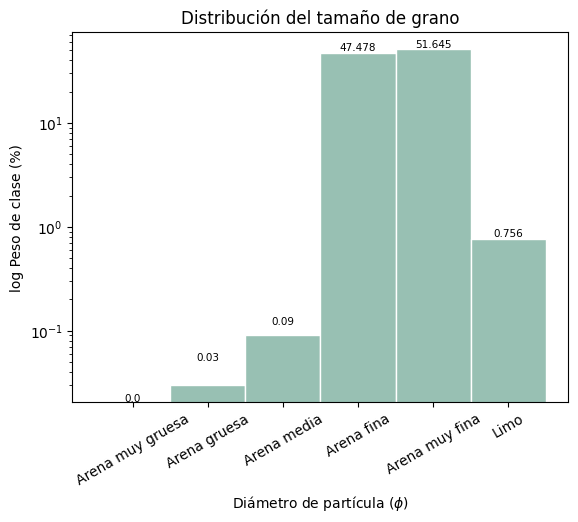

In [38]:
plt.bar(aggregated_data['Termino descriptivo'],aggregated_data['Peso Retenido (%)'], width=1, ec='white', color='#98c0b3')
# Personalizar el gráfico
plt.title('Histograma de Aperture (Escala Personalizada)')
plt.xlabel('Diámetro de partícula ' r'$(\phi)$')

# Valores personalizados en el eje x
#custom_xticks = [min(data['Aperture']), '', '', np.median(bin_edges), '','',max(data['Aperture'])]
#plt.xticks(aggregated_data['cut_data'], custom_xticks, rotation=0)
plt.xticks(rotation=30)
#plt.ylim(0,1200)
plt.yscale('log')  # Escala logarítmica en el eje Y
plt.ylabel('log Peso de clase (%)')
plt.title('Distribución del tamaño de grano')

# Mostrar el valor de cada barra encima de las barras
for i, v in enumerate(aggregated_data['Peso Retenido (%)']):

    plt.text(i, round(v + 0.02,2), str(v), ha='center', va='bottom',fontsize=7.5)

""" # Crear un tercer eje arriba
ax2 = plt.twiny()
# Valores personalizados para el tercer eje
custom_top_axis_values = [1.1, 2.2, 3.3, 4.4, 5.5]
# Ubicación del tercer eje
ax2.set_xlim(ax2.get_xlim())
ax2.set_xticks(aggregated_data['Phi'])
ax2.set_xticklabels(custom_top_axis_values, fontsize=10)
ax2.set_xlabel('Valores del tercer campo') """

# Ajustar el espacio entre subgráficos
#plt.subplots_adjust(top=0.85)

# Guardar como un archivo PNG, JPG, PDF
plt.savefig('histograma_Gmas.png', dpi=300, bbox_inches='tight') #El argumento dpi controla la resolución en el caso de los formatos PNG y JPG. 
                                        #bbox_inches='tight' se utiliza para asegurarse de que los márgenes de la figura estén ajustados correctamente en la imagen guardada.

# Mostrar el histograma
plt.show()